# Simple Linear Regression - Delivery Time

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
del_time = pd.read_csv("delivery_time.csv")

In [5]:
del_time.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [6]:
y = del_time['Delivery Time']
x1 = del_time['Sorting Time']

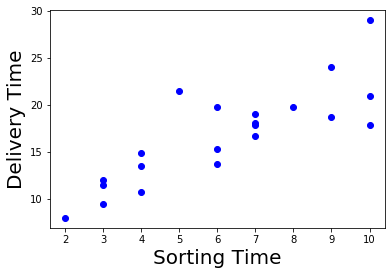

In [8]:
plt.plot(x1,y,'bo')
plt.xlabel('Sorting Time',fontsize=20)
plt.ylabel('Delivery Time',fontsize=20)
plt.show()

In [16]:
y.corr(x1) #correlation co-efficient 

0.8259972607955326

In [14]:
x = sm.add_constant(x1)
result = sm.OLS(y,x).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Fri, 19 Mar 2021   Prob (F-statistic):           3.98e-06
Time:                        20:44:14   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            6.5827      1.722      3.823      0.001       2.979      10.186
Sorting Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Correlation co-efficient of transformed variables

In [21]:
y.corr(np.log(x1)) # log transformation on x1 - sorting time

0.8339325279256241

In [23]:
np.log(y).corr(x1) # log transformation on y - delivery time

0.8431772637224149

In [24]:
np.log(y).corr(np.log(x1))  # log tansformation on both variables 

0.8787271187739341

### Correlation is more satisfying by Log transformation on both variables

In [27]:
x = sm.add_constant(np.log(x1))
result_log = sm.OLS(np.log(y),x).fit()
result_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery Time   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     64.39
Date:                Fri, 19 Mar 2021   Prob (F-statistic):           1.60e-07
Time:                        21:00:19   Log-Likelihood:                 10.291
No. Observations:                  21   AIC:                            -16.58
Df Residuals:                      19   BIC:                            -14.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            1.7420      0.133     13.086      0.000       1.463       2.021
Sorting Time     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
pred_val = np.exp(result_log.predict(x))

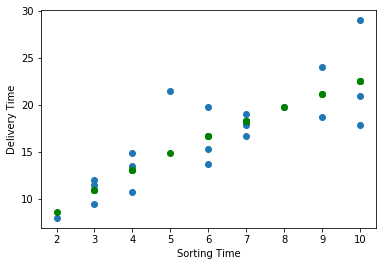

In [39]:
plt.scatter(x1,y)
plt.plot(x1,pred_val,'go')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')
plt.show()

In [41]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(y,pred_val))
print("RMSE for result_log model : {}".format(rmse))

RMSE for result_log model : 2.7458288976145497


### We will consider log model as R-squared value is more satisfying!!
### So final equation for our model is as below

## Delivery_time = exp(1.742 +0.5975(log(sorting_time)))